# Introduction/Business Problem

It is no surprise that one of the leading causes of death in the United States is accidents, including those caused by motor vehicles. In fact, there are, on average, 6 million car accidents in the United States every year, of which 3 million people are injured. Additionally, more than 90 people are estimated to die in car accidents every day. While the largest portion of car accidents are caused by driver error, weather and road conditions still contribute a reasonable amount to these numbers. These conditions include environmental factors such as weather, road condition, time of day, and location. Knowing which factors and how much they affect car accidents will provide important information that can be used to caution drivers during certain road conditions through road signs or warnings. Government officials or organizations in charge of road traffic and regulation should use this information to increase the safety of everyone on the road.

In this project, we will focus on seeing which environmental and road factors affect car accidents the most and building a model that best helps predict the severity of a car accident under certain conditions.

# Data

The data we will be using is the Seattle city data provided by SPD and recorded by Traffic Records. It includes all collisions that occurred at the intersection or mid-block of a segment from years 2004 to 2020. 

Since we are trying to see how environmental factors affect the severity of car accidents, we will primarily look at variables related to weather, road conditions, and location. These variables are `ADDRTYPE`, `WEATHER`, `ROADCOND`, `LIGHTCOND`. We will use these variables to develop a model that determines the severity of the accident (`SEVERITYCODE`).

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('https://prod-hub-indexer.s3.amazonaws.com/files/5b5c745e0f1f48e7a53acec63a0022ab/0/full/4326/5b5c745e0f1f48e7a53acec63a0022ab_0_full_4326.csv')

In [132]:
df.shape

(221006, 40)

In [49]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.339735,47.625393,1,333240,334740,3851889,Unmatched,Intersection,28743.0,9TH AVE N AND ROY ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
1,-122.326712,47.546101,2,333317,334817,3834541,Unmatched,Block,NaN,S MICHIGAN ST BETWEEN 5TH PL S AND 6TH AVE S,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
2,-122.329062,47.586170,3,1367,1367,3671783,Matched,Intersection,31348.0,4TH AVE S AND S HOLGATE ST,...,Dry,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
3,-122.337871,47.606478,4,1189,1189,3548948,Matched,Block,NaN,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
4,-122.380021,47.688726,5,30400,30400,04046023,Unmatched,Intersection,23863.0,18TH AVE NW AND NW 83RD ST,...,NaN,NaN,NaN,4046023.0,NaN,NaN,NaN,0,0,N


In [114]:
df = df[['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']] #keep only variables we need

In [115]:
df.dropna(subset=['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], inplace = True) #drop na values

In [116]:
df.reset_index(inplace = True, drop = True)

In [55]:
df.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,1,Intersection,Clear,Dry,Daylight
1,1,Block,Clear,Dry,Daylight
2,2,Intersection,Clear,Dry,Unknown
3,1,Intersection,Clear,Dry,Dark - Street Lights On
4,1,Block,Clear,Dry,Daylight


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192404 entries, 0 to 192403
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  192404 non-null  object
 1   ADDRTYPE      192404 non-null  object
 2   WEATHER       192404 non-null  object
 3   ROADCOND      192404 non-null  object
 4   LIGHTCOND     192404 non-null  object
dtypes: object(5)
memory usage: 7.3+ MB


In [57]:
df.shape

(192404, 5)

In [58]:
df['SEVERITYCODE'].unique()

array(['1', '2', '2b', '3', '0'], dtype=object)

In [59]:
df['SEVERITYCODE'].value_counts()

1     131635
2      57400
2b      3030
3        338
0          1
Name: SEVERITYCODE, dtype: int64

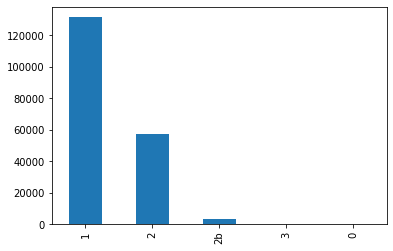

In [60]:
fig, ax = plt.subplots()
df['SEVERITYCODE'].value_counts().plot(ax=ax, kind='bar')

In [61]:
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [63]:
df['ADDRTYPE'].value_counts()

Block           125973
Intersection     65679
Alley              752
Name: ADDRTYPE, dtype: int64

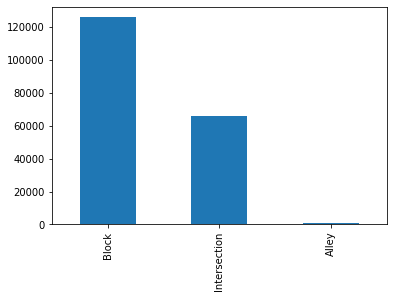

In [64]:
fig, ax = plt.subplots()
df['ADDRTYPE'].value_counts().plot(ax=ax, kind='bar')

In [65]:
df['WEATHER'].unique()

array(['Clear', 'Raining', 'Overcast', 'Unknown', 'Other', 'Snowing',
       'Partly Cloudy', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain',
       'Blowing Sand/Dirt', 'Severe Crosswind'], dtype=object)

In [66]:
df['WEATHER'].value_counts()

Clear                       113653
Raining                      33836
Overcast                     28330
Unknown                      14099
Snowing                        908
Other                          809
Fog/Smog/Smoke                 570
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               49
Severe Crosswind                26
Partly Cloudy                    9
Name: WEATHER, dtype: int64

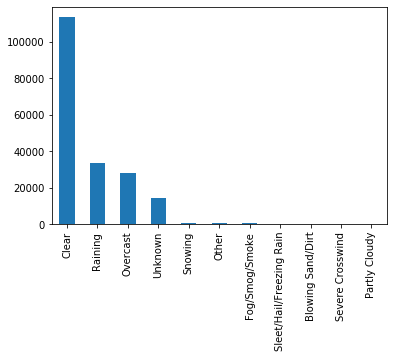

In [67]:
fig, ax = plt.subplots()
df['WEATHER'].value_counts().plot(ax=ax, kind='bar')

In [68]:
df['ROADCOND'].unique()

array(['Dry', 'Wet', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Standing Water', 'Oil', 'Sand/Mud/Dirt'], dtype=object)

In [69]:
df['ROADCOND'].value_counts()

Dry               127305
Wet                48441
Unknown            14059
Ice                 1215
Snow/Slush          1002
Other                128
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

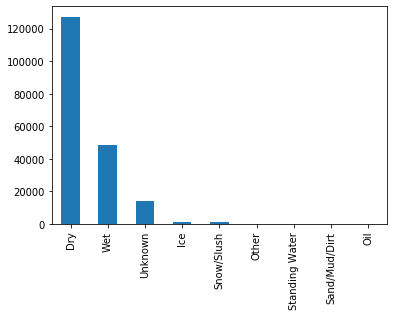

In [70]:
fig, ax = plt.subplots()
df['ROADCOND'].value_counts().plot(ax=ax, kind='bar')

In [71]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Unknown', 'Dark - Street Lights On',
       'Dark - Street Lights Off', 'Dusk', 'Dawn', 'Other',
       'Dark - No Street Lights', 'Dark - Unknown Lighting'], dtype=object)

In [72]:
df['LIGHTCOND'].value_counts()

Daylight                    118358
Dark - Street Lights On      49763
Unknown                      12645
Dusk                          6015
Dawn                          2585
Dark - No Street Lights       1562
Dark - Street Lights Off      1221
Other                          235
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

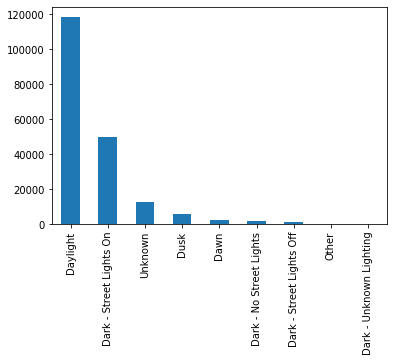

In [73]:
fig, ax = plt.subplots()
df['LIGHTCOND'].value_counts().plot(ax=ax, kind='bar')

In [117]:
df.drop(df[(df['SEVERITYCODE'] == '0') | (df['WEATHER'] == 'Unknown') 
           | (df['ROADCOND'] == 'Unknown') | (df['LIGHTCOND'] == 'Unknown')].index, inplace = True) #drop rows with unknown values

In [75]:
df.shape

(174570, 5)

In [106]:
df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts()

SEVERITYCODE  ADDRTYPE
0             1           79694
              2           34824
              0             523
1             1           29032
              2           27109
              0              77
2             2            1505
              1            1466
              0               5
3             1             184
              2             151
Name: ADDRTYPE, dtype: int64

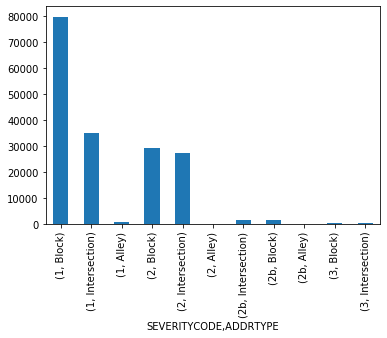

In [76]:
data = df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts()
data.plot.bar()

In [107]:
df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()

SEVERITYCODE  WEATHER
0             1          73563
              6          21700
              4          18434
              9            665
              2            367
              3            176
              8             83
              0             30
              7             18
              5              5
1             1          35856
              6          11179
              4           8705
              2            183
              9            164
              3             79
              8             28
              0             13
              7              7
              5              4
2             1           1990
              6            523
              4            443
              9             10
              3              5
              2              3
              8              2
3             1            225
              4             53
              6             50
              2              3
              3  

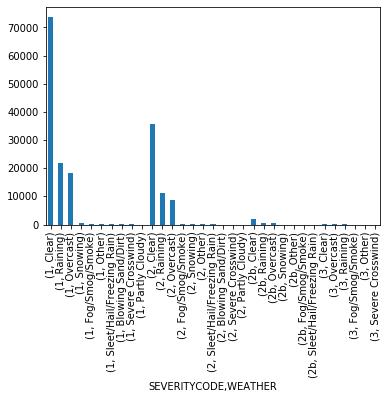

In [120]:
data = df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()
data.plot.bar()

In [108]:
df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()

SEVERITYCODE  ROADCOND
0             0           82312
              7           30995
              1             824
              5             687
              6              76
              3              64
              4              46
              2              37
1             0           39996
              7           15683
              1             267
              5             156
              3              42
              6              29
              2              24
              4              21
2             0            2201
              7             744
              1              18
              5               7
              3               3
              6               3
3             0             265
              7              69
              1               1
Name: ROADCOND, dtype: int64

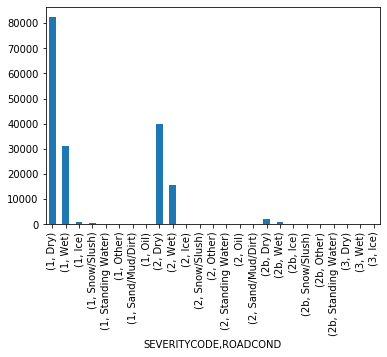

In [119]:
data = df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()
data.plot.bar()

In [109]:
df.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()

SEVERITYCODE  LIGHTCOND
0             5            74951
              2            32656
              6             3754
              4             1624
              0             1091
              1              808
              7              147
              3               10
1             5            38393
              2            14391
              6             1917
              4              821
              0              328
              1              309
              7               51
              3                8
2             5             1752
              2             1002
              6              107
              4               59
              1               28
              0               24
              7                4
3             5              167
              2              144
              6               14
              4                5
              1                4
              0                1
Name: LIGHTCOND, dt

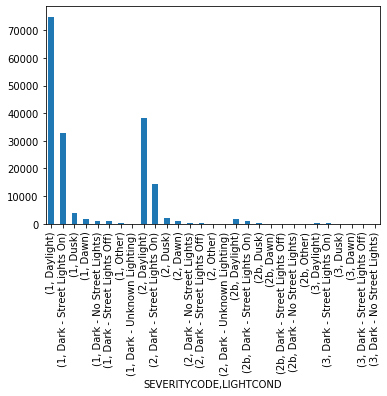

In [118]:
data = df.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()
data.plot.bar()

# Methodology

In the first step we properly loaded the data and kept only the variables we need for the analysis, which are the variable we are trying to predict (`SEVERITYCODE`) and the predictor variables (`ADDRTYPE`, `WEATHER`, `ROADCOND`, `LIGHTCOND`). We then explored the different types of values within each variable and plotted them on a bar graph. After removing unknown entries in the data, we then plotted each predictor variable value and grouped them by severitycode. This gives a visual idea of what factors seemed to be more common in the different types of accidents.

In the second step we will prepare our data for model building. Since all the variables are categorical, we will label encode them to produce numerical labels. We will then randomly split our data into training and test sets for our model.

In the third and final step we will fit our data into different models and evaluate them to see which produces the highest accuracy. Since we want to use machine learning models that can be used to predict a certain class or group based on given conditions, the models we fit will be SVM (Support Vector Machines), K-Nearest Neighbors, Logistic Regression, and Decision Trees. After fitting each model, we will calculate its accuracy using various methods such as f1-score, jaccard similarity score, and classification report.

In [122]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn.metrics import log_loss

In [80]:
#Assign numerical labels to categorical variables
le = preprocessing.LabelEncoder()
df['SEVERITYCODE'] = le.fit_transform(df['SEVERITYCODE'])
df['ADDRTYPE'] = le.fit_transform(df['ADDRTYPE'])
df['WEATHER'] = le.fit_transform(df['WEATHER'])
df['ROADCOND'] = le.fit_transform(df['ROADCOND'])
df['LIGHTCOND'] = le.fit_transform(df['LIGHTCOND'])
df['SEVERITYCODE'] = le.fit_transform(df['SEVERITYCODE'])

In [81]:
X = df[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 1.3114736 , -0.7093804 , -0.62319541,  0.60614255],
       [-0.74025284, -0.7093804 , -0.62319541,  0.60614255],
       [ 1.3114736 , -0.7093804 , -0.62319541, -1.47212512],
       ...,
       [-0.74025284, -0.7093804 , -0.62319541, -1.47212512],
       [-0.74025284, -0.7093804 , -0.62319541,  0.60614255],
       [-0.74025284, -0.7093804 , -0.62319541,  0.60614255]])

In [82]:
y = np.asarray(df['SEVERITYCODE'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (122199, 4) (122199,)
Test set: (52371, 4) (52371,)


# Modeling

SVM

In [84]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
yhat_clf = clf.predict(X_test)
yhat_clf

array([0, 0, 0, ..., 0, 0, 0])

K-Nearest Neighbors

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [88]:
yhat_kn = neigh.predict(X_test)
yhat_kn

array([0, 0, 0, ..., 0, 0, 0])

Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
LR = LogisticRegression(C=0.01, multi_class = 'multinomial', max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
yhat_LR = LR.predict(X_test)
yhat_LR

array([0, 0, 0, ..., 0, 0, 0])

Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
predTree = Tree.predict(X_test)
predTree

array([0, 0, 0, ..., 0, 0, 0])

# Evaluation

SVM

In [95]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_clf))

Train set Accuracy:  0.6597271663434234
Test set Accuracy:  0.6572912489736686


In [96]:
f1_score(y_test, yhat_clf, average='weighted') 

0.5213709856308176

In [97]:
jaccard_similarity_score(y_test, yhat_clf)

/Users/veronicazhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6572912489736686

In [138]:
metrics.precision_score(y_test, yhat_clf, average='weighted')

0.43203178597736525

In [139]:
metrics.recall_score(y_test, yhat_clf, average='weighted')

0.6572912489736686

In [98]:
print (classification_report(y_test, yhat_clf))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     34423
           1       0.00      0.00      0.00     16896
           2       0.00      0.00      0.00       954
           3       0.00      0.00      0.00        98

    accuracy                           0.66     52371
   macro avg       0.16      0.25      0.20     52371
weighted avg       0.43      0.66      0.52     52371



/Users/veronicazhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors

In [99]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_kn))

Train set Accuracy:  0.6358235337441387
Test set Accuracy:  0.6317236638597697


In [124]:
f1_score(y_test, yhat_kn, average='weighted') 

0.5395379811233175

In [125]:
jaccard_similarity_score(y_test, yhat_kn)

/Users/veronicazhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6317236638597697

In [140]:
metrics.precision_score(y_test, yhat_kn, average='weighted')

0.5286711151648776

In [141]:
metrics.recall_score(y_test, yhat_kn, average='weighted')

0.6317236638597697

In [126]:
print (classification_report(y_test, yhat_kn))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77     34423
           1       0.30      0.06      0.11     16896
           2       0.00      0.00      0.00       954
           3       0.00      0.00      0.00        98

    accuracy                           0.63     52371
   macro avg       0.24      0.25      0.22     52371
weighted avg       0.53      0.63      0.54     52371



/Users/veronicazhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression

In [102]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

Train set Accuracy:  0.6597271663434234
Test set Accuracy:  0.6572912489736686


In [121]:
f1_score(y_test, yhat_LR, average='weighted') 

0.5213709856308176

In [130]:
jaccard_similarity_score(y_test, yhat_LR)

0.6572912489736686

In [142]:
metrics.precision_score(y_test, yhat_LR, average='weighted')

0.43203178597736525

In [143]:
metrics.recall_score(y_test, yhat_LR, average='weighted')

0.6572912489736686

In [104]:
print(classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     34423
           1       0.00      0.00      0.00     16896
           2       0.00      0.00      0.00       954
           3       0.00      0.00      0.00        98

    accuracy                           0.66     52371
   macro avg       0.16      0.25      0.20     52371
weighted avg       0.43      0.66      0.52     52371



/Users/veronicazhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.7087700067484126

Decision Tree

In [105]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

Train set Accuracy:  0.6597598998355142
Test set Accuracy:  0.6572912489736686


In [127]:
f1_score(y_test, predTree, average='weighted') 

0.5213709856308176

In [128]:
jaccard_similarity_score(y_test, predTree)

0.6572912489736686

In [144]:
metrics.precision_score(y_test, predTree, average='weighted')

0.43203178597736525

In [145]:
metrics.recall_score(y_test, predTree, average='weighted')

0.6572912489736686

In [129]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     34423
           1       0.00      0.00      0.00     16896
           2       0.00      0.00      0.00       954
           3       0.00      0.00      0.00        98

    accuracy                           0.66     52371
   macro avg       0.16      0.25      0.20     52371
weighted avg       0.43      0.66      0.52     52371



# Results and Discussion

Through our exploratory analysis we see that the majority of accidents from this dataset resulted in prop damage. In all accident groups, it appears that the accident occurred the most during daylight, when the weather was clear, and road condition was dry. The second most likely conditions that cause accidents are rainy weather, wet road conditions, and being in the dark with street lights on. Most of the accidents that resulted in prop damage occurred at a block, while accidents that resulted in injury occurred almost equally at blocks and intersections. It seems that accidents that resulted in fatality only occurred at blocks and intersections. 

The four models we built are all very similar in terms of prediction and accuracy. However, overall it seems that the model accuracy for all models can be greatly improved. The highest prediction accuracy is only around 65.73%. The classification reports for all the models (except K-Nearest Neighbors) also show that the model could only predict accidents with prop damage. This could likely be due to eliminating many variables that could be more significant predictors or having significantly more data for prop damage accidents than other accidents. We only kept the "environmental" variables so our model had very limited data and predictors. It is pretty difficult to choose the most accurate model since the test set accuracy is the same for the SVM, Logistic Regression, and Decision Tree models. However, the Decision Tree train set accuracy is slightly higher so we can say that this model is more accurate.

In terms of recommendations, based on our observations and analysis, we should pay more attention on the road when faced with conditions that do not seem to bring much risk. Road signs and warnings should be put up to caution drivers and pedestrians, especially at blocks and intersections. More caution and speed limits should be enforced during rainy and wet conditions since they are the second lead cause of car accidents (in this model). Installing signs and lights that light up in the dark will be very helpful in cautioning drivers at night. If we want to predict the severity of car accidents solely based on these environmental and road factors, the decision tree would be a good model to use.

# Conclusion

In this project, we focused on finding the major environmental factors and road conditions that affect car accidents, as well as building a model that can help predict the severity of car accidents based on these conditions. We cleaned our data and prepared it for exploratory data analysis and model building. We fit four machine learning models on our data and determined which produces the most accurate predictions. Based on our analysis and results, we made some recommendations to improve the safety of drivers and those on the road during certain road and weather conditions. Finally, we suggested a model that produces the best results for further analysis of car accident severity based on the same predictors.